# Chapter 02

In [34]:
# import pint units package
import pint
ureg = pint.UnitRegistry()

# add USD to unit definitions for only this problem
# dimensions of USD will be [] (dimensionless)
ureg.define('USD = 1 * count')

# import sympy functions
from sympy import *
init_printing()

# force plots to display in notebook, not new window
%matplotlib inline

## Problem 2.6

You are trying to decide which of two automobiles to buy. They are:

- American made, costs \$14,500, and has mileage of 28 miles/gallon
- European made, costs \$21,700, and has mileable of 19 km/L

If gas costs $1.25/gal, estimate how many miles you would have to driver for the lower fuel consumption of the second car to compensate for the higher cost of this car?

In [35]:
# car 1 info
cost1 = 14500 * ureg.USD
mileage1 = 28 * ureg.miles/ureg.gallons

# car 2 info
cost2 = 21700 * ureg.USD
mileage2 = 19 * ureg.kilometers/ureg.liters

# convert car 2 to same units as car 1
mileage2.ito(ureg.miles/ureg.gallons)

# info for both
gascost = 1.25 * ureg.USD / ureg.gallons

In [36]:
# create variables as symbols
x, y1, y2 = symbols('x y1 y2')

In [37]:
# ensure units are all compatible (i. e. no km and miles mixed)
print("gascost is", gascost)
print("mileage1 is", mileage1)
print("mileage2 is", mileage2)
print("variable x has units", (x * ureg.miles).units)
print("cost1 is", cost1)
print("cost2 is", cost2)

gascost is 1.25 USD / gallon
mileage1 is 28.0 mile / gallon
mileage2 is 44.69077083333333 mile / gallon
variable x has units mile
cost1 is 14500 USD
cost2 is 21700 USD


In [56]:
# test proposed equation for units and dimensionality: 
# expected: units = USD; dimension=dimensionless)
if((gascost/mileage1 * (x * ureg.miles) + cost1).units          == ureg.USD and 
   (gascost/mileage1 * (x * ureg.miles) + cost1).dimensionality == ureg.dimensionless):
    print("Proposed Line 1 OK")
else:
    print("Proposed line 1 does not match in units and/or dimensionality")

if((gascost/mileage2 * (x * ureg.miles) + cost2).units          == ureg.USD and 
   (gascost/mileage2 * (x * ureg.miles) + cost2).dimensionality == ureg.dimensionless):
    print("Proposed Line 2 OK")
else:
    print("Proposed line 2 does not match in units and/or dimensionality")

Proposed Line 1 OK
Proposed Line 2 OK


In [45]:
# define car 1 line and display expression (use .magnitude for compatibility)
y1 = gascost.magnitude/mileage1.magnitude*x + cost1.magnitude
y1

In [44]:
#define car 2 line and display expression (use .magnitude for compatibility)
y2 = gascost.magnitude/mileage2.magnitude*x + cost2.magnitude
y2

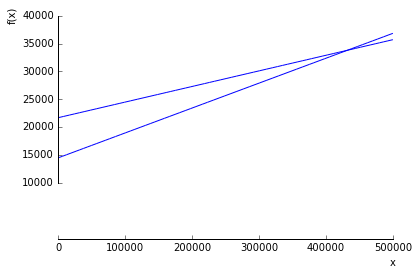

In [41]:
# plot both lines to visualize intersection
plot(y1, y2, (x,0,500000),ylim=(0,40000))

In [42]:
# set y1 - y2 = 0 and solve for x (in miles)
solve(y1 - y2,x)

In [43]:
# round to 2 sig figs
round(431839, -4) * ureg.miles

<Quantity(430000, 'mile')>